<img align="left" style="padding-right:10px;" width="150" src="www/320px-Star_Wars_Logo.svg.png">

*Este notebook forma parte del TEMA 1.4. HERRAMIENTAS DE ANÁLISI: PROGRAMACIÓN EN R Y PROGRAMACIÓN EN PYTHON del MÓDULO 1: HERRAMIENTAS BIG DATA del master Máster en Big Data & Data Science de la Universitat de Barcelona - IL3 - FORYMAT elaborado por Ferran Carrascosa Mallafrè.*

< [Elementos básicos de Python](modulo1_tema4_Py_10_elem_bas.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Colecciones de objetos](modulo1_tema4_Py_30_colec_obj.ipynb) >

<a href="https://colab.research.google.com/github/griu/mbdds_fc20/blob/master/Python/modulo1_tema4_Py_20_matplotlib.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" title="Abre y Ejecuta en Google Colaboratory"></a>
: Padawan! Cuando inicias sesión en Colab, debes clonar el repositorio y mover el directorio de trabajo.

In [ ]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

# GRÁFICOS CON MATPLOTLIB

![esquemaMatplotLib](https://matplotlib.org/3.3.1/_images/anatomy.png)

In [1]:
import pandas as pd

In [2]:
people_df = pd.read_pickle("www/people_df.pkl")

In [ ]:
people_df.to_

In [4]:
people_df.shape

(82, 16)

In [103]:
people_df.loc[(people_df["gender"].isin(['n/a', 'none'])) | people_df["gender"].isna(),"gender"] = 'none'

gender_cat = ['female', 'hermaphrodite', 'male', 'none']

people_df["gender_cat"] = pd.Categorical(people_df["gender"],categories = gender_cat)


people_df[["gender_cat","gender_cat_code"]]
#['female', 'hermaphrodite', 'male', 'n/a', 'none']

people_df["nfilms"] = 30 * people_df.films.apply(lambda x: len(x))

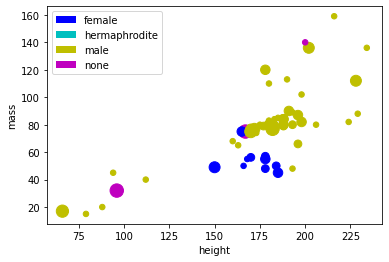

In [106]:

colors = ['b', 'c', 'y', 'm', 'r']
colors = ['b', 'c', 'y', 'm']
people_df["gender_cat_code"] = [colors[i] for i in people_df["gender_cat"].cat.codes]


scatter = plt.scatter('height', 'mass', c='gender_cat_code', s='nfilms', data=people_df[people_df.mass<600])

plt.xlabel('height')
plt.ylabel('mass')

# leyenda personalizada
classes = gender_cat
class_colours = colors
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc="upper left")

plt.show()



In [108]:
import seaborn as sns

<AxesSubplot:xlabel='birth_year'>

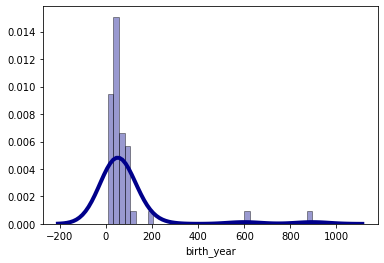

In [109]:
# Density Plot and Histogram of all arrival delays
sns.distplot(people_df.birth_year, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0, 0.5, 'N')

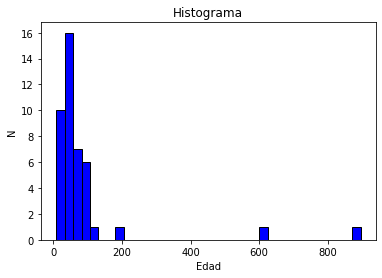

In [114]:
# matplotlib histogram
plt.hist(people_df.birth_year, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histograma')
plt.xlabel('Edad')
plt.ylabel('N')

<AxesSubplot:xlabel='birth_year'>

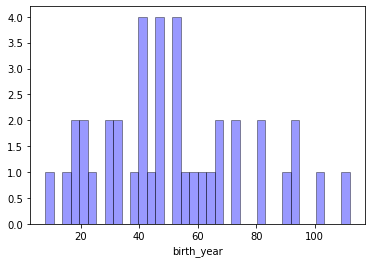

In [116]:
# seaborn histogram
sns.distplot(people_df.birth_year[people_df.birth_year<200], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

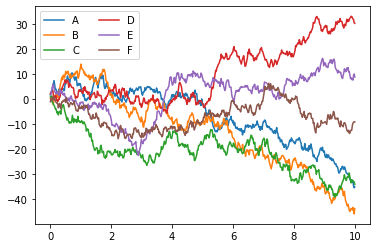

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [4]:
import seaborn as sns
sns.set()

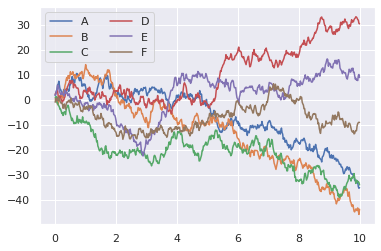

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

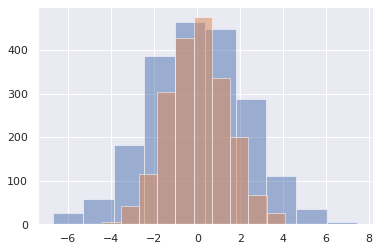

In [7]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5, )

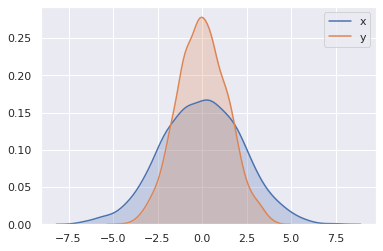

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

<AxesSubplot:xlabel='y'>

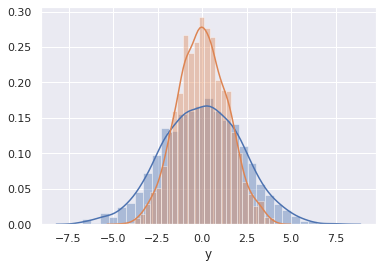

In [10]:
sns.distplot(data['x'])
sns.distplot(data['y'])

In [1]:
import pandas as pd

In [3]:
people_df = pd.read_pickle("www/people_df.pkl")

In [4]:
people_df.shape

(82, 16)

< [Elementos básicos de Python](modulo1_tema4_Py_10_elem_bas.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Colecciones de objetos](modulo1_tema4_Py_30_colec_obj.ipynb) >

<a href="https://colab.research.google.com/github/griu/mbdds_fc20/blob/master/Python/modulo1_tema4_Py_20_matplotlib.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" title="Abre y Ejecuta en Google Colaboratory"></a>